<a href="https://colab.research.google.com/github/MiguelStrelow/CNC/blob/main/Relat%C3%B3rio_1_Miguel_de_Tunes_Strelow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas


In [8]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import math
import time
from tabulate import tabulate

#Função para plotar gráficos


In [9]:
def plotar(f, titulo, resultados, limite1, limite2):
  aux = []
  inicio = limite1
  fim = limite2
  nro_de_pontos = 1000
  plt.axhline(y=0, color = "black", linestyle = '--')
  curva = np.linspace(inicio, fim, nro_de_pontos)
  valores = [f(valor) for valor in curva]
  plt.plot(curva, valores, linestyle='-')

  for i in resultados:
    aux.append(0)

  plt.scatter(resultados, aux, marker = ".", color = "red")
  plt.title(titulo)
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.grid()
  plt.show()

#Funções

In [10]:
#f= lambda x : x**3 -9*x+5
#f= lambda x: math.e**x-x-2

In [11]:
x = smp.Symbol('x')
f = (x**3)-6*(x**2)+11*x-6.1

#Método da Bissecção


In [12]:
def bisseccao(f, a_0, b_0, n, precisao, lim1, lim2):
    f = smp.lambdify(x, f, "numpy")
    if f(a_0)*f(b_0)>=0:
      print("Método da bissecção falhou")
      return None

    a_n = a_0
    b_n = b_0
    M = f(a_n)
    resultados = []
    for i in range(0, n):
      x_n = (a_n + b_n)/2
      resultados.append(x_n)
      if M*f(x_n) > 0:
        a_n = x_n
      else:
        b_n = x_n
      M = f(a_n)

      if (b_n - a_n) < precisao:
        print("Método da Bisseção:\n")
        print("Precisão atingida\n")
        print("Raiz aproximada:", x_n)
        plotar(f, "Bissecção", resultados, lim1, lim2)
        return resultados
      else:
        if i == (n-1):
          print("Método da Bisseção:\n")
          print("Limite de iterações atingido\n")
          print("Raiz aproximada:", x_n)
          plotar(f, "Bissecção", resultados, lim1, lim2)
          return resultados

In [13]:
#bisseccao(f, -2, 0, 5, 0.0000001, -2, 0)

# Método da Falsa Posição

In [14]:
def FP(f, a_0, b_0, n, precisao, lim1, lim2):
  f = smp.lambdify(x, f, "numpy")

  if f(a_0)*f(b_0)>=0:
    print("Método da Falsa Posição falhou")
    return None
  a_n = a_0
  b_n = b_0
  resultados = []
  for i in range(0, n):
    f1 = f(a_n)
    f2 = f(b_n)
    x_n = ((a_n * f2) - (b_n * f1))/(f2 - f1)
    resultados.append(x_n)
    if f(x_n) > 0:
      a_n = x_n
    else:
      b_n = x_n
#Caso aconteça de a diferença ser negativa
      #if (b_n - a_n < 0):
        #check = -1*(b_n - a_n)
      #else:
    check = (b_n - a_n)

    if check < precisao:
      print("Método da Falsa Posição:\n")
      print("Precisão atingida\n")
      print("Raiz aproximada:", x_n)
      plotar(f, "Falsa Posição", resultados, lim1, lim2)
      return resultados
    else:
      if i == (n-1):
        print("Método da Falsa Posição:\n")
        print("Limite de iterações atingido\n")
        print("Raiz aproximada:", x_n)
        plotar(f, "Falsa Posição", resultados, lim1, lim2)
        return resultados

In [15]:
##FP(f, 0, 1, 100, 0.0005)

#Método de Newton-Raphson

In [16]:
def nr(f, x_0, precisao, iteracoes, lim1, lim2):
  fm = smp.lambdify(x, f, "numpy")
  df = smp.lambdify(x, smp.diff(f, x), "numpy")
  resultados = []

  if (abs(fm(x_0)) < precisao):
    print("Precisão atingida\n")
    print("Raiz aproximada:", x_0)
    return x_0

  x_n = x_0
  for i in range(0, iteracoes):
    fx = fm(x_0)
    dfx = df(x_0)

    if dfx == 0:
      print("Método NR falhou")
      return

    x_n = x_0 - (fx/dfx)
    resultados.append(x_n)

    if ((abs(fm(x_n)) < precisao) or abs(x_n - x_0) < precisao):
      print("Método de Newton-Raphson:\n")
      print("Precisão atingida\n")
      print("Raiz aproximada:", x_n)
      plotar(fm, "Newton-Raphson", resultados, lim1, lim2)
      return resultados
    if iteracoes <= 100:
      if i == (iteracoes-1):
        print("Método de Newton-Raphson:\n")
        print("Limite de iterações atingido\n")
        print("Raiz aproximada:", x_n)
        plotar(fm, "Newton-Raphson", resultados, lim1, lim2)
        return resultados
    else:
      if i == (iteracoes - 1):
        print("Método da Secante:\n")
        print("Limite de iterações atingido, função provavelmente diverge\n")
        return 0
    x_0 = x_n


In [17]:
##nr(f, 1, 0.001, 100)

#Método da Secante


In [18]:
def sec(f, x_0, x_1, precisao, iteracoes, lim1, lim2):
  fm = smp.lambdify(x, f, "numpy")
  resultados = []

  if (abs(fm(x_0)) < precisao):
    print("Precisão atingida\n")
    print("Raiz aproximada:", x_0)
    return x_0

  if ((abs(fm(x_1)) < precisao) or abs(x_1 - x_0) < precisao):
    print("Precisão atingida\n")
    print("Raiz aproximada:", x_1)
    return x_1

  for i in range(0, iteracoes):
    fx = fm(x_0)

    x_n = x_1 - (fm(x_1) / (fm(x_1) - fm(x_0)))*(x_1 - x_0)
    resultados.append(x_n)

    if ((abs(fm(x_n)) < precisao) or abs(x_n - x_1) < precisao):
      print("Método da Secante:\n")
      print("Precisão atingida\n")
      print("Raiz aproximada:", x_n)
      plotar(fm, "Secante", resultados, lim1, lim2)
      return resultados
    if i == (iteracoes-1):
      print("Método da Secante:\n")
      print("Limite de iterações atingido\n")
      print("Raiz aproximada:", x_n)
      plotar(fm, "Secante", resultados, lim1, lim2)
      return resultados
    x_0 = x_1
    x_1 = x_n

In [19]:
##sec(f, 0, 1, 0.001, 100)

#Relatório 1

##1. Considere o polinômio P (x) = x^3 − 36x^2 + 188x − 240.

Verifique que um dos zeros de P(x) se localiza no intervalo [29.5,31].

Para aproximar o zero referido, podem ser usadas diferentes estratégias como, por exemplo:

a) método da Bissecção no referido intervalo, com tol= 10-4;

b) método de Newton-Raphson, com a aproximação inicial x(0) = 29.5 e tol= 10-
4.

Compare os resultados obtidos com os dois métodos.

Método da Bisseção:

Precisão atingida

Raiz aproximada: 29.999969482421875


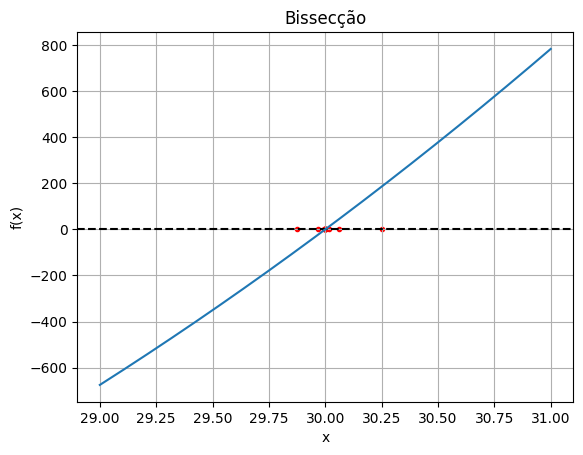

Método de Newton-Raphson:

Precisão atingida

Raiz aproximada: 30.00000000006042


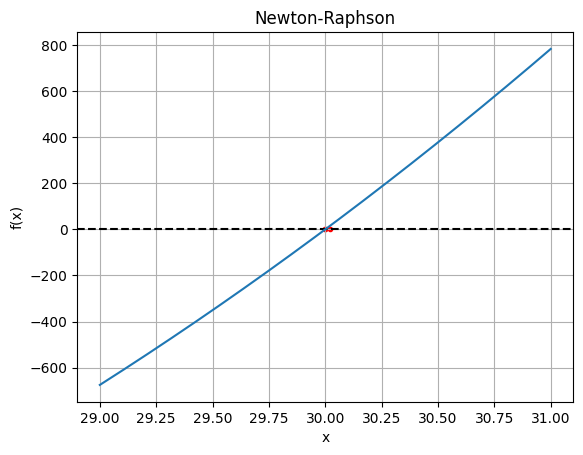

╒════╤════════════════════════╤═══════════════════╕
│    │   Resultados Bissecção │     Resultados NR │
╞════╪════════════════════════╪═══════════════════╡
│  0 │      30.25000000000000 │ 30.01963690255650 │
├────┼────────────────────────┼───────────────────┤
│  1 │      29.87500000000000 │ 30.00002854040121 │
├────┼────────────────────────┼───────────────────┤
│  2 │      30.06250000000000 │ 30.00000000006042 │
├────┼────────────────────────┼───────────────────┤
│  3 │      29.96875000000000 │                   │
├────┼────────────────────────┼───────────────────┤
│  4 │      30.01562500000000 │                   │
├────┼────────────────────────┼───────────────────┤
│  5 │      29.99218750000000 │                   │
├────┼────────────────────────┼───────────────────┤
│  6 │      30.00390625000000 │                   │
├────┼────────────────────────┼───────────────────┤
│  7 │      29.99804687500000 │                   │
├────┼────────────────────────┼───────────────────┤
│  8 │      

In [20]:
p = (x ** 3) - (36 * (x ** 2)) + (188 * x) - 240

#Bissecção
bissec = []
bisstart = time.time()
bissec = (bisseccao(p, 29.5, 31, 100, 10**-4, 29, 31))
bissend = time.time()
bistime = [(bissend - bisstart)]
#Newton-Raphson
newton = []
nrstart = time.time()
newton = (nr(p, 29.5, 10**-4, 100, 29, 31))
nrend = time.time()
nrtime = [(nrend - nrstart)]
#tabelaresults = {'Resultados Bissecção': bissec, 'Resultados NR': nr}
print(tabulate({'Resultados Bissecção': bissec, 'Resultados NR': newton}, headers = 'keys', tablefmt = 'fancy_grid', showindex = True, floatfmt = '.14f'))
print(tabulate({'Tempo Bissecção': bistime, 'Tempo NR': nrtime}, headers = 'keys', tablefmt = 'fancy_grid', showindex = True, floatfmt = '.14f'))

O método da bissecção, apesar de ter iterado mais vezes, levou pouco mais tempo do que o NR. Acretido que neste caso, NR seja mais vantaso por ter tido melhor desempenho nos dois critérios considerados (tempo e número de iterações)

##2. Aplique o método da Falsa Posição para calcular a raiz de x^2 - 5 = 0 com tol = 0.01
a) partindo do intervalo inicial [2,2.5];

b) partindo do intervalo inicial [2,3].

Podemos afirmar que a raiz exata x = x’ ± tol ? Justifique


Método da Falsa Posição:

Precisão atingida

Raiz aproximada: 2.236842105263158


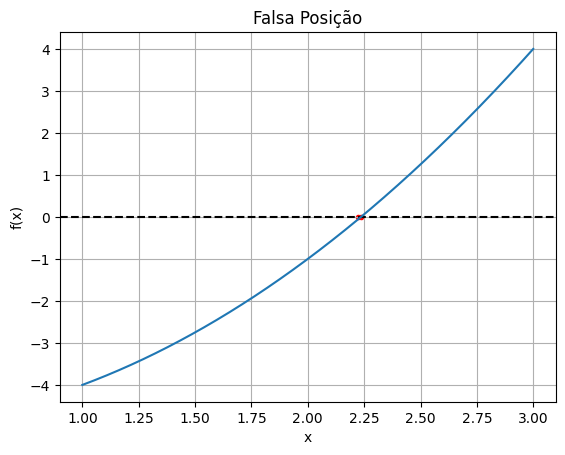

Método da Falsa Posição:

Precisão atingida

Raiz aproximada: 2.238095238095238


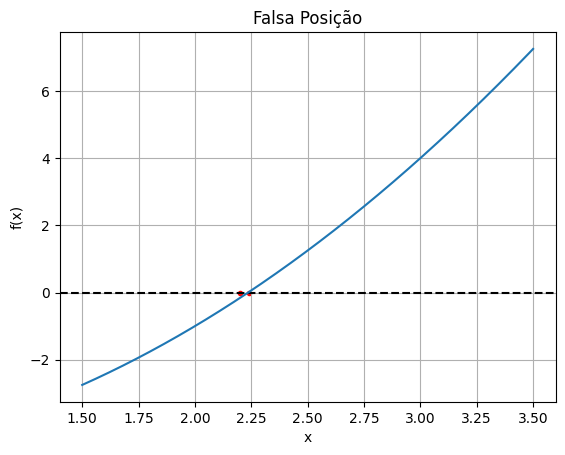

╒════╤══════════════════════╤══════════════════════╕
│    │   Resultados teste 1 │   Resultados teste 2 │
╞════╪══════════════════════╪══════════════════════╡
│  0 │     2.22222222222222 │     2.20000000000000 │
├────┼──────────────────────┼──────────────────────┤
│  1 │     2.23684210526316 │     2.23809523809524 │
╘════╧══════════════════════╧══════════════════════╛
Raiz exata: 2.23606797749979
A expressão x = x'± tol não aparenta ser válida neste caso, pois somar ou subtrair 0.01 a qualquer uma das aproximações acarretaria em uma perda de precisão


In [30]:
#Definindo a função
f = (x ** 2) - 5
#No intervalo [2, 2.5]
teste1 = FP(f, 2, 2.5, 100, 0.01, 1, 3)

#No intervalo [2, 3]
teste2 = FP(f, 2, 3, 100, 0.01, 1.5, 3.5)

#Tabela
print(tabulate({'Resultados teste 1': teste1, 'Resultados teste 2': teste2}, headers = 'keys', tablefmt = 'fancy_grid', showindex = True, floatfmt = '.14f'))

#Raiz exata => x = sqrt(5)
raiz = math.sqrt(5)
print('Raiz exata:', raiz)

print("A expressão x = x'± tol não aparenta ser válida neste caso, pois somar ou subtrair 0.01 a qualquer uma das aproximações acarretaria em uma perda de precisão")

##3. Considere a equação e^(1/x) − x = 0.
a) Mostre graficamente que a equação anterior tem uma única raiz no intervalo
[1,2].

b) Considere a aproximação inicial x^(0) = 1. Verifique o método de Newton -
Raphson converge.

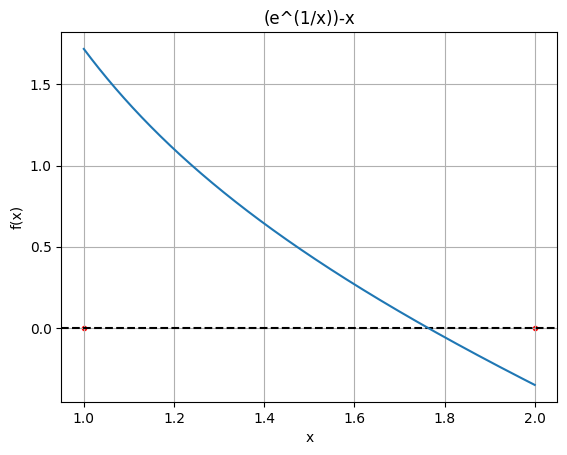

In [22]:
#a)
#Definindo a função:
f = (math.e**(1/x)) - x
#Plotando o gráfico
plotar(smp.lambdify(x, f, "numpy"), "(e^(1/x))-x", [1, 2], 1, 2)

Método de Newton-Raphson:

Precisão atingida

Raiz aproximada: 1.762954114503411


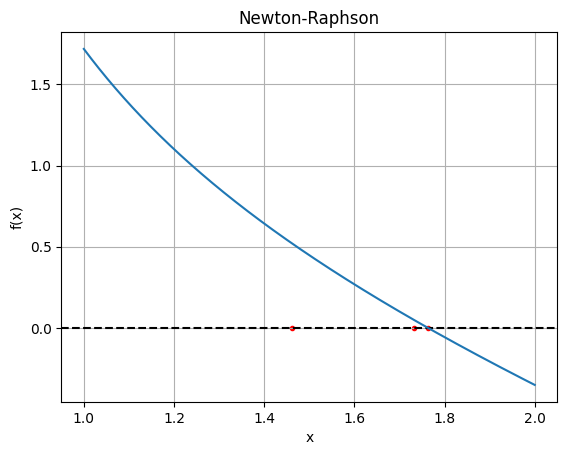

A função converge


In [23]:
#b) Aplicando NP com x_0 = 1
conv = nr(f, 1, 0.001, 1000, 1, 2)
if conv != 0:
  print("A função converge")
else:
  print("A função provavelmente diverge")

##4. A recolha de energia solar através da focagem de um campo plano de espelhos numa central de recolha foi estudada por Vant-Hull (1976).
A equação para a
concentração geométrica do fator C é dada por:
C = PI ((h/cos(A))^2)F/(0.5PI * D^2)(1 + sen(A) - 0.5*cos(A))

em que A é o ângulo do campo, F é a cobertura da fração do campo com
espelhos, D é o diâmetro do coletor e h é o comprimento do coletor.
Considerando h = 300, F = 0.8 e D = 14, calcule o ângulo positivo A inferior a PI/25 para o qual a concentração do fator C é 1200. Utilize o método iterativo mais
adequado e considere no critério de paragem ε1 = ε2 = 10^−3 ou no máximo 3
iterações.

Método da Bisseção:

Limite de iterações atingido

Raiz aproximada: 0.10995574287564278


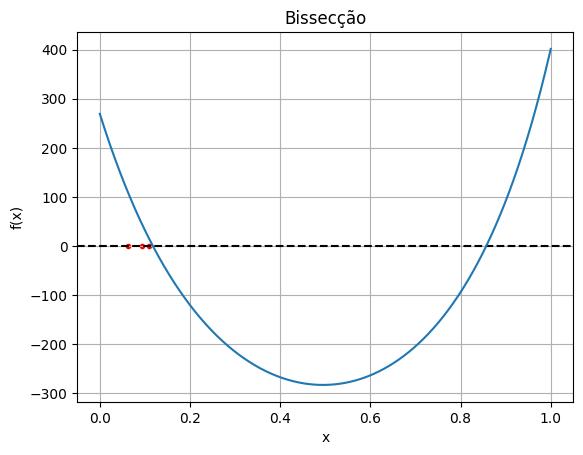

[0.06283185307179587, 0.0942477796076938, 0.10995574287564278]
Método da Falsa Posição:

Limite de iterações atingido

Raiz aproximada: 0.11771589604974597


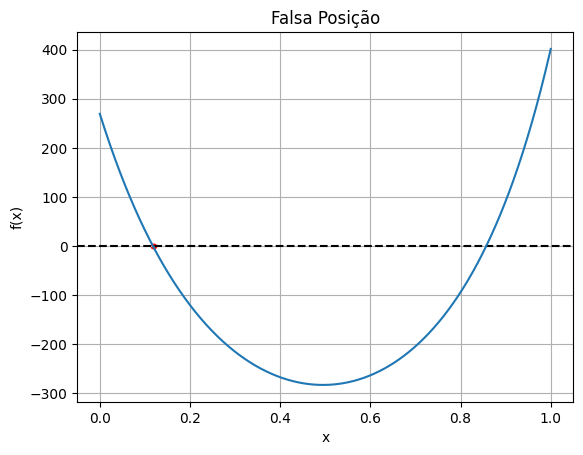

[0.11952114264777414, 0.11806123785099022, 0.11771589604974597]
Método de Newton-Raphson:

Precisão atingida

Raiz aproximada: 0.11760901314595587


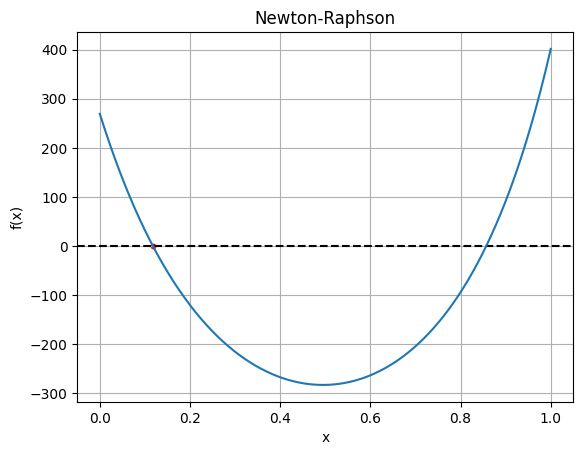

[0.11746441241094899, 0.11760901314595587]
Método da Secante:

Precisão atingida

Raiz aproximada: 0.11760920302195825


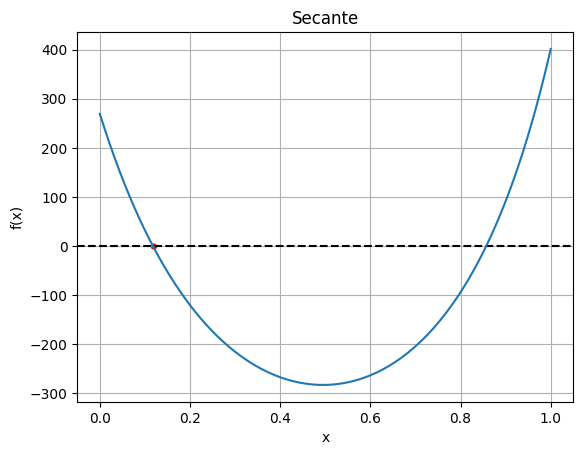

[0.11952114264777412, 0.11757490160906607, 0.11760920302195825]


In [24]:
#Definindo pi
pi = math.pi
#Definindo a função
f = (((pi * ((300 / smp.cos(x)) ** 2)) * 0.8) / ((0.5 * pi * 14 ** 2) * (1 + smp.sin(x) - 0.5 * smp.cos(x)))) - 1200
#Testando os métodos
print(bisseccao(f, 0, pi/25, 3, 10**-3, 0, 1))
print(FP(f, 0, pi/25, 3, 10**-3, 0, 1))
print(nr(f, pi/25, 10**-3, 3, 0, 1))
print(sec(f, 0, pi/25, 10**-3, 3, 0, 1))

Apenas o método da bisseção parece apresentar grandes discrepâncias em relação aos demais. O método NR aparenta ser o mais adequado pois apresenta um valor tão próximo quantos os demais, mas com uma iteração a menos.

##5. Um certo equipamento de 20000 reais vai ser pago durante 6 anos.
O pagamento anual é de 4000 reais. A relação entre o custo do equipamento P, o pagamento anual A, o número de anos n e a taxa de juro i é a seguinte:
A = P*((i * (1 + i) ^ n) / ((1 + i) ^ n) - 1)
Utilize os métodos da Bissecção, Falsa Posição, Newton-Raphson e Secante para determinar a taxa de juro utilizada nos cálculos. O valor da taxa de juro pertence ao intervalo [0.05, 0.15]. Para a paragem do processo iterativo use ε1 = ε2 = 0.05 ou no máximo 3 iterações. Compare e explique os resultados obtidos por cada método (por exemplo: rapidez da convergência e esforço computacional)

Método da Bisseção:

Precisão atingida

Raiz aproximada: 0.07500000000000001


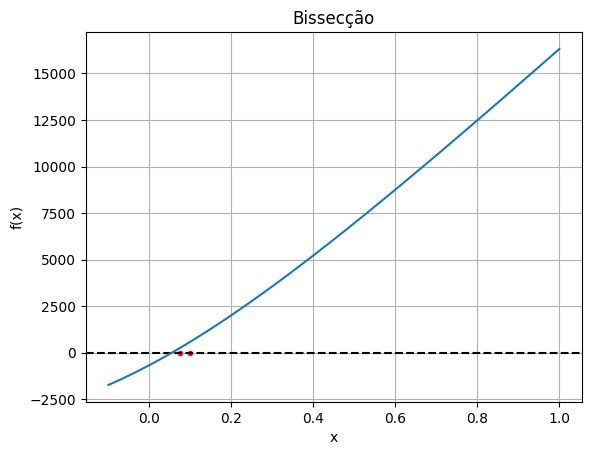

Método da Falsa Posição:

Precisão atingida

Raiz aproximada: 0.054437008041522274


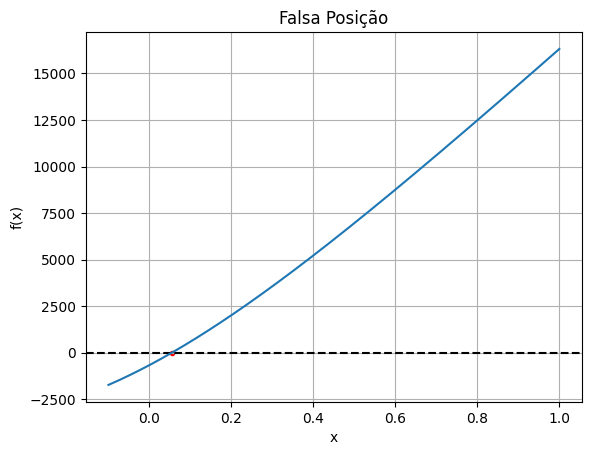

Método de Newton-Raphson:

Precisão atingida

Raiz aproximada: 0.054733707380005436


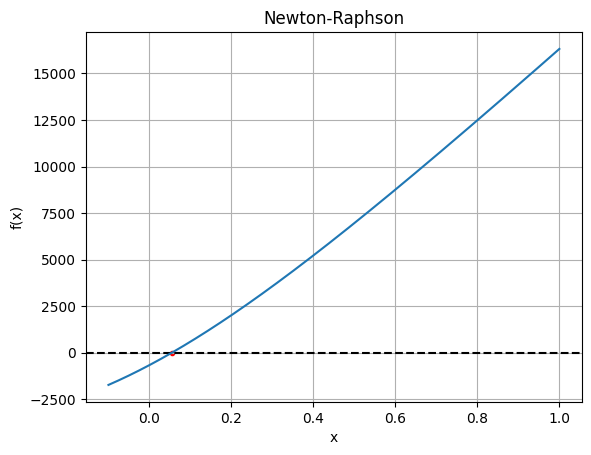

Método da Secante:

Precisão atingida

Raiz aproximada: 0.05470129182001768


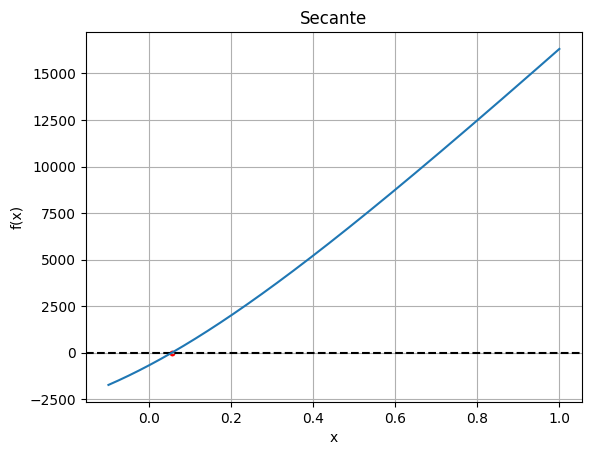

╒════╤════════════════════════╤══════════════════╤══════════════════╤══════════════════════╕
│    │   Resultados Bissecção │    Resultados FP │    Resultados NR │   Resultados Secante │
╞════╪════════════════════════╪══════════════════╪══════════════════╪══════════════════════╡
│  0 │       0.10000000000000 │ 0.05443700804152 │ 0.05473370738001 │     0.05443700804152 │
├────┼────────────────────────┼──────────────────┼──────────────────┼──────────────────────┤
│  1 │       0.07500000000000 │                  │                  │     0.05470129182002 │
╘════╧════════════════════════╧══════════════════╧══════════════════╧══════════════════════╛
╒════╤═════════════════════════╤══════════════════╤══════════════════╤═══════════════════════╕
│    │   Tempo Bissecção(em s) │   Tempo FP(em s) │   Tempo NR(em s) │   Tempo Secante(em s) │
╞════╪═════════════════════════╪══════════════════╪══════════════════╪═══════════════════════╡
│  0 │        0.24904561042786 │ 0.26236820220947 │ 0.2829086780

In [33]:
#Definindo a função, separada pra ficar mais fácil de enxergar
f1 = ((x * ((1 + x) ** 6)))
f2 = ((((1 + x) ** 6) - 1))
f = (20000*(f1/f2)) - 4000
#Aplicando os métodos e calculando tempo de execução
bisstart = time.time()
bissec = bisseccao(f, 0.05, 0.15, 3, 0.05, -0.1, 1)
bissend = time.time()
fpstart = time.time()
falsapos = FP(f, 0.05, 0.15, 3, 0.05, -0.1, 1)
fpend = time.time()
nrstart = time.time()
newton = nr(f, 0.05, 0.05, 3, -0.1, 1)
nrend = time.time()
secstart = time.time()
secante = sec(f, 0.05, 0.15, 0.05, 3, -0.1, 1)
secend = time.time()
bistime = [(bissend - bisstart)]
fptime = [(fpend - fpstart)]
nrtime = [(nrend-nrstart)]
sectime = [(secend - secstart)]


#Criando uma tabela para comparação
print(tabulate({'Resultados Bissecção': bissec, 'Resultados FP': falsapos, 'Resultados NR': newton, 'Resultados Secante': secante}, headers = 'keys', tablefmt = 'fancy_grid', showindex = True, floatfmt = '.14f'))
print(tabulate({'Tempo Bissecção(em s)': bistime, 'Tempo FP(em s)': fptime, 'Tempo NR(em s)': nrtime, 'Tempo Secante(em s)': sectime}, headers = 'keys', tablefmt = 'fancy_grid', showindex = True, floatfmt = '.14f'))

Tanto FP quanto NR atingiram a precisão em apenas uma iteração. Os outros, em apenas duas. Apesar disto, o método da bisseção foi o mais veloz, apesar de encontrar um valor bastante discrepante em relação aos demais. Bissec não deverá ser usado caso alta precisão seja uma necessidade, mas pode ser considerado caso a diferença de tempo seja crucial para o sistema em questão. No geral, FP e NR são os melhores candidatos, sendo a diferença de tempo entre eles da mesma ordem da diferença entre bissec e FP, sendo assim, vale a mesma ressalva. O método da secante chegou a um valor muito próximo de NR, apesar de ter levado um décimo de segundo a mais. Desta forma, o "vencedor" neste caso parece óbvio, visto que NR teve uma aproximação maior que FP, em um tempo muito menor do que a secante.